## Load libraries

In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import numpy as np
from sklearn import preprocessing
import os
try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]='1'

In [3]:
booking_ids=[13,               
154618822837, 
223338299461,     
395136991308,     
403726925929,     
455266533495,     
481036337234,     
515396075694,     
695784702084,     
919123001348,     
970662608932,     
1279900254294,    
1348619731077,    
1391569403991,    
1408749273124,    
1511828488211,    
1632087572573,    
1649267441751]

In [4]:
label = pd.read_csv('labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv', index_col=None, header=0)

In [5]:
label.drop(label[label.bookingID.isin(booking_ids)].index, inplace=True)

(array([14999.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,  4983.]),
 array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    ]),
 <a list of 16 Patch objects>)

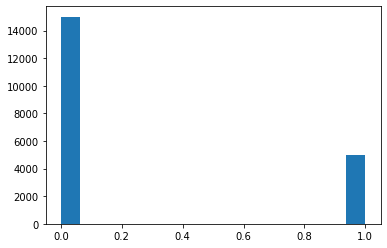

In [6]:
plt.hist(label['label'], bins='auto')

## Load data

In [7]:
features = 'features' 
all_files = glob.glob(features + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

features_frame = pd.concat(li, axis=0, ignore_index=True)


In [8]:
features_frame

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,678604832892,8.000,253.815094,-0.018842,-9.778915,0.141910,0.000004,0.127894,-0.003946,849.0,22.800875
1,197568495666,6.000,46.780491,3.053528,-11.339175,1.049893,-0.228431,0.100745,-0.009538,656.0,8.029377
2,1709396983925,3.000,301.000000,0.567177,9.913507,0.318716,-0.022131,0.011083,0.002845,369.0,0.000000
3,919123001475,3.482,297.000000,3.598595,10.094262,-1.747821,0.002806,0.166651,0.088069,1468.0,3.599888
4,1039382085795,3.210,0.000000,0.466644,8.914932,3.394867,0.002533,0.005173,0.002060,276.0,0.000000
5,137438953558,3.900,93.000000,0.200760,8.569458,3.120728,-0.020660,0.032898,0.025208,580.0,11.310000
6,309237645463,4.000,84.000000,3.875485,7.491802,4.688738,-0.128823,-0.431096,-0.267018,122.0,5.068843
7,962072674369,3.900,70.000000,0.550683,8.648121,2.976084,-0.051165,0.088625,-0.018571,990.0,13.590181
8,1503238553717,3.900,107.000000,1.776552,10.178062,-0.347170,-0.402938,-0.263526,0.173833,1280.0,14.932049
9,128849018933,3.000,0.000000,0.257975,9.191938,3.012504,0.008522,0.001065,-0.012783,35.0,0.000000


In [9]:
features_frame=features_frame[features_frame.bookingID.isin(label.bookingID)]

In [10]:
len(features_frame.bookingID.unique())

19982

In [ ]:
features_frame_group=features_frame.sort_values(['bookingID','second'],ascending=True).groupby('bookingID')

In [ ]:
features_frame['accel'] =features_frame_group['Speed'].diff()

In [ ]:
features_frame['accel'] = features_frame['accel'].fillna(0)

In [ ]:
features_frame['bearing_vel'] =features_frame_group['Bearing'].diff()

In [ ]:
features_frame['bearing_vel'] = features_frame['bearing_vel'].fillna(0)

In [ ]:
features_frame

In [ ]:
y = label.sort_values(['bookingID'],ascending=True)

In [ ]:
y = y['label']

In [ ]:
features_frame_group=features_frame.sort_values(['bookingID','second'],ascending=True)\
.groupby('bookingID')\
.agg(['min', 'max','mean','median','std','var','sum'])


In [ ]:
features_frame_group.columns = ["_".join(x) for x in features_frame_group.columns.ravel()]

In [ ]:
featute_names=list(features_frame_group.columns)

In [ ]:
features_frame_group.head

In [ ]:
X = features_frame_group.values

In [ ]:
len(X[0])==len(featute_names)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, random_state=42)

## Create Dataset object for LightGBM

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train,categorical_feature='auto')
lgb_test = lgb.Dataset(X_valid, y_valid, reference=lgb_train,categorical_feature='auto')

## Configuration dictionary

In [ ]:
params = {
    'boosting_type' : 'gbdt',
    'objective':'binary',
    'metric': ['binary_logloss','auc'],
    'num_trees':1000,
    'learning_rate' :0.1
}

## Training

In [ ]:
evals_result = {}  # to record eval results for plotting
gbm = lgb.train(params,
                lgb_train,
               
                valid_sets=[lgb_train, lgb_test],
                feature_name=featute_names,
               
                evals_result=evals_result,
                verbose_eval=10,
               early_stopping_rounds=30)

## Plot metrics recorded during training

In [ ]:
def render_metric(metric_name):
    ax = lgb.plot_metric(evals_result, metric=metric_name, figsize=(10, 5))
    plt.show()

In [ ]:
if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name=params['metric'][0])
else:
    render_metric(params['metric'][0])

## Plot feature importances

In [ ]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=4):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()

In [ ]:
if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(render_plot_importance,
             importance_type=['split', 'gain'],
             max_features=(1, X_train.shape[-1]),
             precision=(0, 10))
else:
    render_plot_importance(importance_type='split')

## Plot split value histogram

In [ ]:
def render_histogram(feature):
    ax = lgb.plot_split_value_histogram(gbm, feature=feature,
                                        bins='auto', figsize=(10, 5))
    plt.show()

In [ ]:
if INTERACTIVE:
    # create widget for interactive split value histogram
    interact(render_histogram,
             feature=gbm.feature_name())
else:
    render_histogram(feature='f26')

## Plot trees

In [ ]:
def render_tree(tree_index, show_info, precision=4):
    show_info = None if 'None' in show_info else show_info
    return lgb.create_tree_digraph(gbm, tree_index=tree_index,
                                   show_info=show_info, precision=precision)

In [ ]:
if INTERACTIVE:
    # create widget to switch between trees and control info in nodes
    interact(render_tree,
             tree_index=(0, gbm.num_trees() - 1),
             show_info=SelectMultiple(  # allow multiple values to be selected
                 options=['None',
                          'split_gain',
                          'internal_value',
                          'internal_count',
                          'leaf_count'],
                 value=['None']),
             precision=(0, 10))
    tree = None
else:
    tree = render_tree(84, ['None'])
tree

# RNN

In [11]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
device

device(type='cuda')

In [13]:
# Hyper-parameters
input_size = 10
hidden_size = 128
num_layers = 2
num_classes = 2
batch_size = 50
num_epochs = 10
learning_rate = 0.01

In [14]:
features_frame_group=features_frame.sort_values(['bookingID','second'],ascending=True).groupby('bookingID')

In [15]:
count = features_frame_group.size()

In [16]:
sequence_length=max(count)

In [17]:
def pad_zeros(a,sequence_length):
      
        length=sequence_length-len(a)
        width=a.shape[1]
        if length > 0:
            zeros=np.zeros((length, width))
            desired_array = np.concatenate((zeros, a))
            return np.array(desired_array).astype('float32')
        else:
            return np.array(a).astype('float32')

In [18]:
y = label.sort_values(['bookingID'],ascending=True)
y = y['label']
y=np.array(y)

In [19]:
X = features_frame_group.apply(lambda x: x.drop(["bookingID"], axis=1).values)

In [20]:
X=np.array(X)

In [21]:
X = [pad_zeros(x,sequence_length) for x in X]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42)

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.10, random_state=42)

In [24]:
class SecurityDataset(torch.utils.data.Dataset):
    def __init__(self, X,y):
        self.X=X
        self.y=y
        
    def __getitem__(self, index):

        return (X[index], y[index])

    def __len__(self):
        return len(X) # of how many data(images?) you have

In [25]:
# Data loader
training_set = SecurityDataset(X_train, y_train)

train_loader = torch.utils.data.DataLoader(dataset=training_set,
                                           batch_size=batch_size, 
                                           shuffle=True)

val_set = SecurityDataset(X_valid, y_valid)

val_loader = torch.utils.data.DataLoader(dataset=val_set,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_set = SecurityDataset(X_test, y_test)

test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [26]:
# Bidirectional recurrent neural network (many-to-one)
class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(BiRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, num_classes)  # 2 for bidirection
    
    def forward(self, x):
        # Set initial states
        
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) # 2 for bidirection 
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size*2)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [27]:
model = BiRNN(input_size, hidden_size, num_layers, num_classes).to(device)

In [28]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [29]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (x, labels) in enumerate(train_loader):
        x = x.reshape(-1, sequence_length, input_size).to(device)
        
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(x)
        
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/10], Step [100/400], Loss: 0.5246
Epoch [1/10], Step [200/400], Loss: 0.4187
Epoch [1/10], Step [300/400], Loss: 0.6448
Epoch [1/10], Step [400/400], Loss: 0.6486
Epoch [2/10], Step [100/400], Loss: 0.5306
Epoch [2/10], Step [200/400], Loss: 0.5901
Epoch [2/10], Step [300/400], Loss: 0.4578
Epoch [2/10], Step [400/400], Loss: 0.5448
Epoch [3/10], Step [100/400], Loss: 0.5241
Epoch [3/10], Step [200/400], Loss: 0.4346
Epoch [3/10], Step [300/400], Loss: 0.5494
Epoch [3/10], Step [400/400], Loss: 0.4150
Epoch [4/10], Step [100/400], Loss: 0.6119
Epoch [4/10], Step [200/400], Loss: 0.5291
Epoch [4/10], Step [300/400], Loss: 0.6515
Epoch [4/10], Step [400/400], Loss: 0.7000
Epoch [5/10], Step [100/400], Loss: 0.6000
Epoch [5/10], Step [200/400], Loss: 0.5141
Epoch [5/10], Step [300/400], Loss: 0.5294
Epoch [5/10], Step [400/400], Loss: 0.5337
Epoch [6/10], Step [100/400], Loss: 0.4960
Epoch [6/10], Step [200/400], Loss: 0.5462
Epoch [6/10], Step [300/400], Loss: 0.5407
Epoch [6/10

In [30]:
# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for x, labels in test_loader:
        x = x.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(x)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model is: {} %'.format(100 * correct / total)) 

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model is: 75.06255630067061 %
